In [2]:
import numpy as np
from hidden_others.mnist import load_mnist

In [7]:
# データの取り込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# データの形状
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
# ランダムに10データを取り出す
train_size = x_train.shape[0]
batch_size = 10

# ランダムなインデックスをチョイス => データを抽出
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]



In [9]:
batch_mask

array([37664, 55983, 11109, 54578, 12414, 56261, 10317, 51508, 33971,
       53471])

In [19]:
def corss_entropy_error(y, t):
    if np.ndim(x) == 1:
        # 次元を増やす
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * log(y + 1e-7)) / batch_size

In [20]:
a = np.array([1, 3])

In [28]:
print(a.size)
print(np.ndim(a))
a.reshape(1, a.size)

2
1


array([[1, 3]])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 数値微分　（中心差分）
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

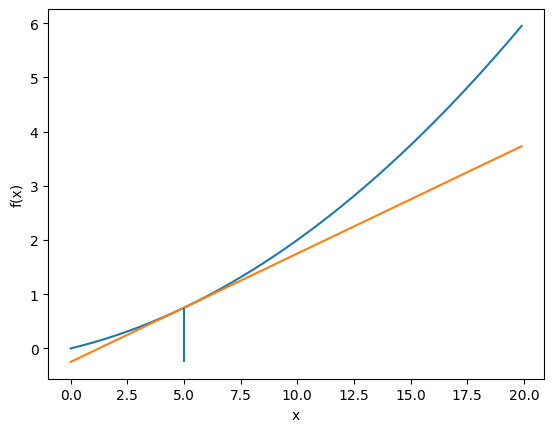

In [34]:
# y = 0.01*x**2 + 0.1*xの関数

def function_1(x):
    return 0.01*x**2 + 0.1*x

# x = ５の接戦
x_pre = 5
y = 0.01*x_pre**2 + 0.1*x_pre
coef = numerical_diff(function_1, 5)
intercept = y - coef*5
diff_y = coef*x + intercept


x = np.arange(0.0, 20.0, 0.1)
y = function(x)
plt.plot(x, y)
plt.plot(x, diff_y)
plt.xlabel('x')
plt.ylabel('f(x)')


In [25]:
numerical_diff(function_1, 5)

0.1999999999990898

In [36]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)

0.1999999999990898


In [46]:
a = np.array([1,2,3])

In [47]:
a.size

3

## 偏微分

In [48]:
# x_0**2 + x_1**2 
def function_2(x):
    return np.sum(x**2)


In [50]:
x = np.array([3.0, 4.0])
h = 1e-4
grad = np.zeros_like(x)

tmp_val = x[0]
x[0] = tmp_val + h
fxh1 = function_2(x)

x[0] = tmp_val - h
fxh2 = function_2(x)

(fxh1 - fxh2) / (2*h)

6.00000000000378

## 勾配法 

In [64]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = function_2(x)

        x[idx] = tmp_val - h
        fxh2 = function_2(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [65]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        # 勾配計算
        grad = numerical_gradient(f, x)
        # パラメータ更新
        x -= lr * grad
        
    return x

In [66]:
# f(x0, x1) = x0**2 + x1**2の最小値を勾配法で求める

# 関数
def function_2(x):
    return np.sum(x**2)

# 初期値
init_x = np.array([-3.0, 4.0])

gradient_descent(f=function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [62]:
grad = numerical_gradient(function_2, init_x)

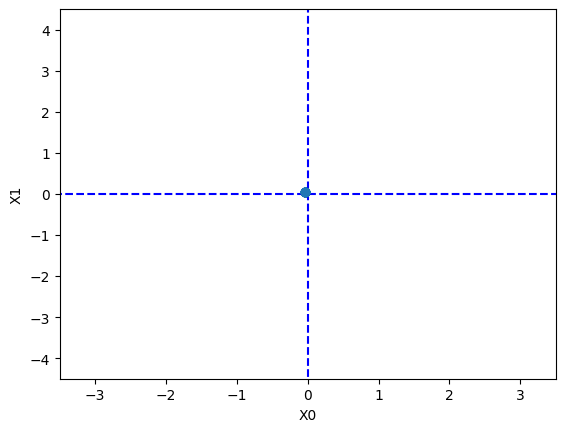

In [71]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [102]:
x = np.array([-3.0, 4.0]) 
x_list = []
for i in range(step_num):
    x_list.append(x)

    grad = numerical_gradient(function_2, x)
    x -= lr * grad

In [103]:
x_list

[array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686]),
 array([-0.03458765,  0.04611686])]

In [110]:
test = []
a = np.array([0, 100])

for i in range(1):
    test.append(a)
    a += 100
    test.append(a)
test

[array([100, 200]), array([100, 200])]

In [111]:
test

[array([100, 200]), array([100, 200])]